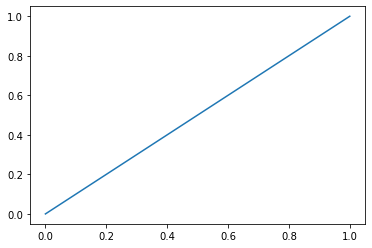

In [1]:
import matplotlib.pyplot as plt
plt.plot([0,1],[0,1]) # HACK

In [2]:
import torch
import numpy as np
from utils import reimporter
import ptvsd
ptvsd.enable_attach()
reimporter.freeze_modules()

In [3]:
reimporter.reimport()
from data_processing.FDDB_loading import pickle_face_data
from data_processing.FDDB import downloadFDDB
# downloadFDDB()
pickle_face_data(10000)

(9000, 1)
(9000, 30000)
(1000, 1)
(1000, 30000)


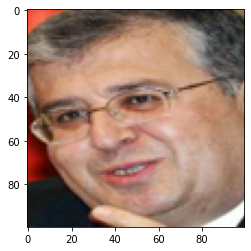

In [3]:
reimporter.reimport()
from data_processing.FDDB_loading import get_pickled_data
from utils.image_plotting import plot_image
train_faces, train_back, test_faces, test_back = get_pickled_data()

train_data = np.concatenate([train_faces, train_back], axis=0)
train_labels = np.concatenate([np.ones((len(train_faces),1)), np.zeros((len(train_back),1))], axis=0)

test_data = np.concatenate([test_faces, test_back], axis=0)
test_labels = np.concatenate([np.ones((len(test_faces),1)), np.zeros((len(test_back),1))], axis=0)

print(train_labels.shape)
print(train_data.shape)

print(test_labels.shape)
print(test_data.shape)
plot_image(train_data[0].reshape(100,100,3)/255)

In [4]:
reimporter.reimport()
from data_processing.dataloader import DataLoader
from torchvision.transforms import RandomRotation, RandomGrayscale
from utils.transforms import noTransform
transforms = [RandomRotation((90,90)), RandomRotation((180,180)), RandomRotation((270,270)), RandomGrayscale(1), noTransform] 
train_dataloader = DataLoader(train_data, train_labels)
test_dataloader = DataLoader(test_data, test_labels)

In [10]:
reimporter.reimport()
from models.trainer import Trainer
from models.face_classifier import FaceClassifier
model = FaceClassifier(3, [8,16], [500, 200, 2])
trainer = Trainer(model, train_dataloader, test_dataloader)

In [11]:
trainer.fit(epochs=10, batch_size=32)

Training using cuda
Epoch 1/10, Train_loss: 0.5041897720690315, Val_loss:0.46384869143366814
Epoch 2/10, Train_loss: 0.4442585277641919, Val_loss:0.43627388402819633
Epoch 3/10, Train_loss: 0.42464368563171817, Val_loss:0.43293748423457146
Epoch 4/10, Train_loss: 0.41036898722039894, Val_loss:0.4156683227047324
Epoch 5/10, Train_loss: 0.40647078088834776, Val_loss:0.41431959718465805
Epoch 6/10, Train_loss: 0.38890221292245475, Val_loss:0.4100079135969281
Epoch 7/10, Train_loss: 0.38246627733217065, Val_loss:0.40870878752321005
Epoch 8/10, Train_loss: 0.37819343678494716, Val_loss:0.4068694096058607
Epoch 9/10, Train_loss: 0.374048298660745, Val_loss:0.3979575401172042
Epoch 10/10, Train_loss: 0.3732033275754739, Val_loss:0.40336945187300444


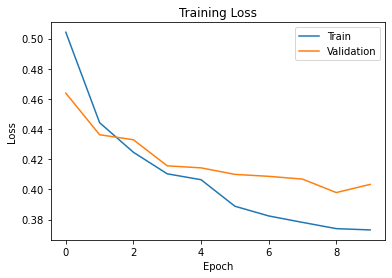

In [12]:
reimporter.reimport()
trainer.plot_loss()

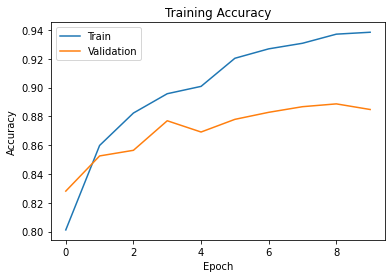

In [13]:
trainer.plot_acc()